<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

## Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

## Exploring your data

### Read cleaned data from file (0.25 points)

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [2]:
# YOUR CODE HERE
cleaned_df = None
cleaned_df=pd.read_csv("./../data/processed/21120201_europe_processed.csv")
#raise NotImplementedError()

In [3]:
# TEST
cleaned_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,2775634.0,1391086.0,1384548.0,10.813117,10.096538,9.0,26.361868,9.386339,8.456056,15.410524,...,7131.404452,19.002727,73.712777,74.398198,80.747814,95.606712,62.731991,97.748993,2022,Albania
1,2811666.0,1407212.0,1404454.0,10.240000,11.325000,9.0,21.562780,34.618040,39.186390,17.459200,...,7131.404452,19.002727,73.712777,74.087000,79.173000,97.604950,60.317581,98.223259,2021,Albania
2,2837849.0,1418585.0,1419264.0,10.285000,10.785000,9.0,20.781540,35.541970,40.169250,16.812830,...,7131.404452,44.580000,73.712777,74.632000,79.676000,100.613602,61.392578,99.468590,2020,Albania
3,2854191.0,1425363.0,1428828.0,10.343000,8.480000,9.0,20.150670,36.416850,41.600220,16.203900,...,7131.404452,40.110000,73.712777,77.168000,81.666000,104.310257,62.076092,101.720718,2019,Albania
4,2866376.0,1430495.0,1435881.0,10.517000,8.308000,9.0,19.745660,37.285730,42.271740,15.573180,...,7131.404452,37.830000,73.712777,77.037000,81.608000,107.403679,56.608871,105.708557,2018,Albania


In [4]:
# TEST
cleaned_df.shape

(1120, 25)

### Numerical analysis using descriptive statistics (0.25 points)

Descriptive statistics show the characteristics of numerical features. It shows us the information such as:
- The mean (and you can go further with advanced techiques as Arithmetic mean, Geometric mean, Harmonic mean)
- The median
- The mode
- Quantiles (Quartiles, Percentiles, Deciles, Crocodiles?)
- Range and IQR (Interquartile Range) (you might find that its relation to box plots)
- Variance and Standard deviation (std dev)
- Coefficient of Variation
- Skewness
- Kurtosis
- Standard Error (of the sample mean)
- Moments
- Covariance and Correlation

Due the scope of this lab, you just need to use basic function of Pandas to calculate basic descriptive statistics information and give insights from it.

In [5]:
df_copy = cleaned_df.drop(['Year', 'Country'], axis='columns')

# YOUR CODE HERE
#raise NotImplementedError()

def lower_quartile(series):
    return (series.quantile([.25]).values[0]).round(1)
def upper_quartile(series):
    return (series.quantile([.75]).values[0]).round(1)
def CV(series):
    return (series.std()/series.mean()).round(1)
def IQR(series):
    return series.quantile([.75]).values[0]-series.quantile([.25]).values[0]

df_copy.agg(['mean',lower_quartile,'median',upper_quartile,IQR,'std','var',CV,'skew','kurtosis','sem']).round(1)

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate
mean,1.399210e+07,7.200463e+06,6.791642e+06,10.8,10.1,10.2,26.4,9.4,8.5,15.4,...,3.385082e+07,7.294217e+09,7131.4,19.0,73.7,74.4,80.7,102.0,58.9,98.3
lower_quartile,2.019648e+06,1.025421e+06,9.939572e+05,9.5,8.5,9.0,22.3,3.6,2.0,10.6,...,-2.045932e+09,1.082436e+09,4629.3,6.8,73.2,72.0,78.9,99.4,49.4,98.2
median,5.376422e+06,2.743866e+06,2.625598e+06,10.7,9.8,10.0,26.4,7.0,4.8,15.4,...,-4.830723e+07,3.873084e+09,7131.4,17.3,73.7,74.8,80.9,102.0,58.9,98.3
upper_quartile,1.053030e+07,5.424500e+06,5.169164e+06,11.7,11.1,11.0,30.4,10.3,8.9,18.6,...,1.472807e+08,7.294217e+09,7131.4,24.7,83.6,78.1,83.2,103.4,69.8,99.5
IQR,8.510648e+06,4.399078e+06,4.175207e+06,2.2,2.6,2.0,8.1,6.7,6.9,8.0,...,2.193213e+09,6.211780e+09,2502.2,17.9,10.4,6.1,4.3,4.1,20.4,1.3
std,2.085705e+07,1.072965e+07,1.013146e+07,1.9,2.4,1.3,6.0,9.2,10.5,6.1,...,1.834483e+10,1.003593e+10,5553.2,16.1,16.2,4.8,3.2,6.5,19.0,5.0
var,4.350164e+14,1.151254e+14,1.026464e+14,3.7,5.8,1.6,36.3,84.4,111.1,36.9,...,3.365329e+20,1.007198e+20,30837702.7,258.5,263.7,22.6,10.1,41.9,359.4,25.1
CV,1.500000e+00,1.500000e+00,1.500000e+00,0.2,0.2,0.1,0.2,1.0,1.2,0.4,...,5.419000e+02,1.400000e+00,0.8,0.8,0.2,0.1,0.0,0.1,0.3,0.1
skew,1.900000e+00,1.900000e+00,1.900000e+00,1.4,0.7,0.6,0.0,2.4,2.9,0.6,...,2.100000e+00,2.300000e+00,4.6,1.4,-1.4,-0.8,-0.8,2.3,0.1,-0.1
kurtosis,2.400000e+00,2.300000e+00,2.500000e+00,5.0,0.4,-0.1,-0.1,6.9,9.8,-0.0,...,2.100000e+01,4.400000e+00,29.3,1.8,2.7,0.0,0.5,13.5,1.6,12.6


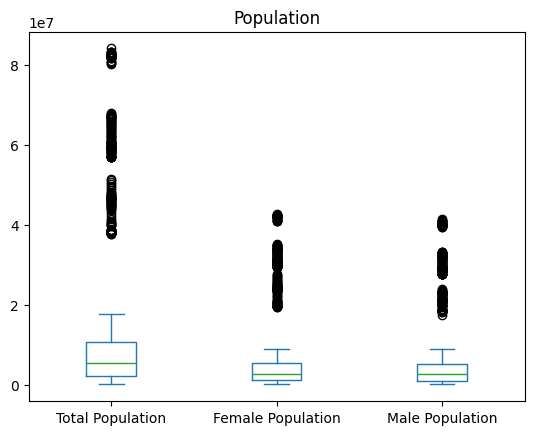

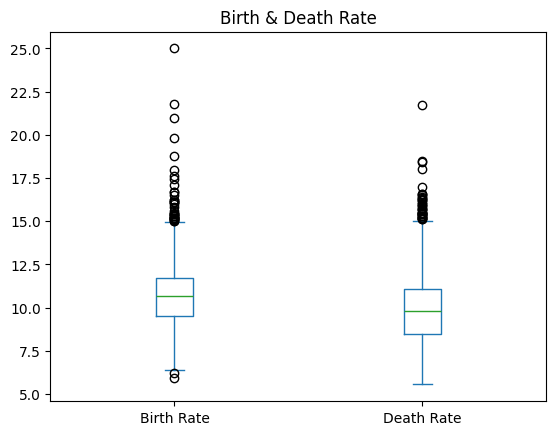

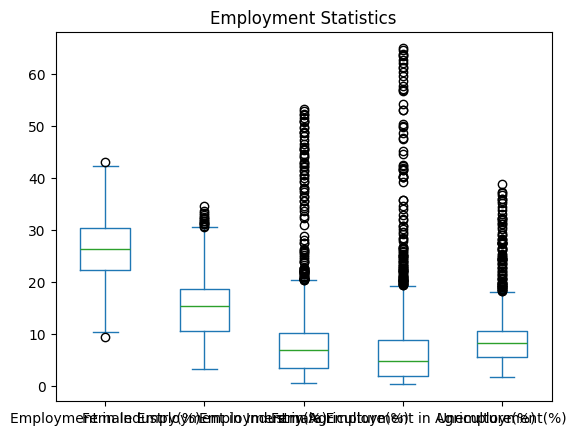

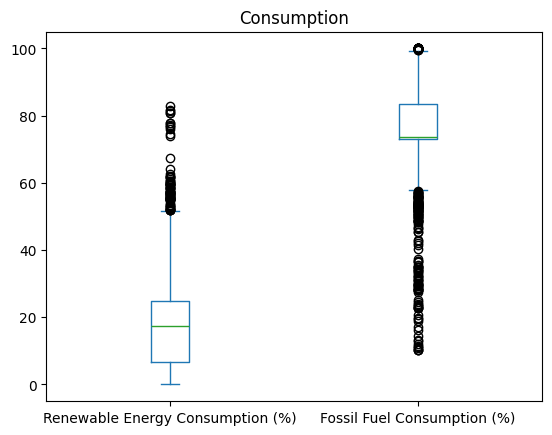

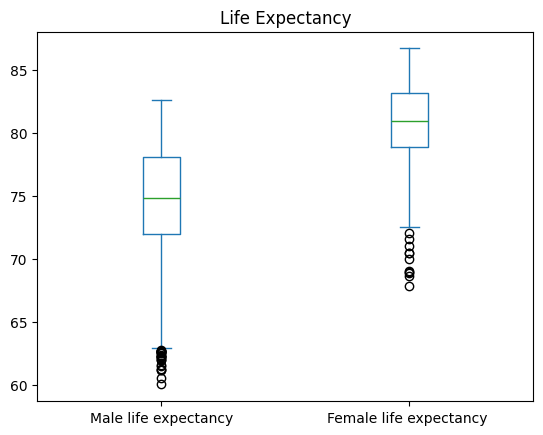

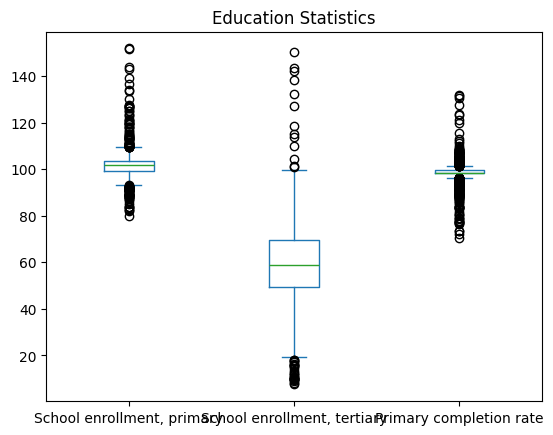

In [6]:
# i=1
# for col_name in df_copy:
#     plt.title(col_name)
#     plt.boxplot(df_copy[col_name])
#     plt.show()
pd.concat([df_copy['Total Population'],df_copy['Female Population'],df_copy['Male Population']], axis=1).plot(kind='box', title='Population')
plt.show()
pd.concat([df_copy['Birth Rate'],df_copy['Death Rate']], axis=1).plot(kind='box', title='Birth & Death Rate')
plt.show()
pd.concat([df_copy['Employment in Industry(%)'],df_copy['Female Employment in Industry(%)'],df_copy['Employment in Agriculture(%)'],df_copy['Female Employment in Agriculture(%)'],df_copy['Unemployment(%)']], axis=1).plot(kind='box', title='Employment Statistics')
plt.show()
pd.concat([df_copy['Renewable Energy Consumption (%)'],df_copy['Fossil Fuel Consumption (%)']], axis=1).plot(kind='box', title='Consumption')
plt.show()
pd.concat([df_copy['Male life expectancy'],df_copy['Female life expectancy ']], axis=1).plot(kind='box', title='Life Expectancy')
plt.show()
pd.concat([df_copy['School enrollment, primary'],df_copy['School enrollment, tertiary'],df_copy['Primary completion rate']], axis=1).plot(kind='box', title='Education Statistics')
plt.show()

**TODO**: Give your obervation here

>Population Distribution: The mean total population is approximately 13.99 million, with a wide range indicated by the quartiles, standard deviation, and coefficient of variation. This suggests significant population variability across different regions or countries.
>
>Gender Distribution: The mean female population is slightly higher than the male population, with a small gender imbalance. The quartiles and standard deviation for both genders show variations in gender distribution across regions.
>
>Birth and Death Rates: The mean birth rate is 10.8 per 1,000 people, which is slightly higher than the mean death rate of 10.1 per 1,000 people. This suggests a slightly growing population, as the birth rate exceeds the death rate.
>
>Education Duration: The mean compulsory education duration is 10.2 years, with some variation indicated by the quartiles. This can reflect differences in educational policies and access to education across regions.
>
>Employment Sector: On average, 26.4% of the population is employed in the industrial sector, while 9.4% are employed in agriculture. The quartiles indicate variability in employment sectors, with some regions having a higher focus on agriculture.
>
>Female Employment: The percentage of females employed in agriculture (8.5%) is higher than in the industry (15.4%). This could suggest differences in gender roles and employment patterns.
>
>Unemployment: The mean unemployment rate is 9.5%, with variations indicated by the quartiles. High unemployment can be a concern for the economy.
>
>Economic Indicators: The mean GDP is in the range of 4.14E+11 USD, with substantial variation (as shown by the standard deviation). The income per capita and net income from abroad vary, indicating differences in economic development.
>
>Energy Consumption: The mean electric power consumption per capita is 7131.4 kWh, with varying renewable and fossil fuel energy consumption percentages. This reflects differences in energy infrastructure and sustainability efforts.
>
>Life Expectancy: The mean life expectancy is higher for females (74.4 years) compared to males (80.7 years). This gender gap in life expectancy may have implications for healthcare and social policies.
>
>Education Enrollment: The primary and tertiary school enrollment rates vary across regions. The primary completion rate is generally high, indicating a positive trend in primary education completion.
>
>Variability and Skewness: Many of the indicators have positive skewness, indicating that the data may be positively skewed. This suggests that there may be some regions or countries with higher values that are driving the mean upward.
>
>Kurtosis: Kurtosis values indicate the degree of data distribution's "tailedness." Some indicators have high kurtosis, suggesting the presence of outliers or extreme values in the data.
>
>Standard Error of the Mean (SEM): The SEM provides a measure of the precision of the mean estimate. Smaller SEM values indicate more reliable mean estimates.
>
>
**Comparing IQR in boxplots and inference**
>
>Population Variables (Total Population, Female Population, Male Population): The IQR for these variables is relatively large, indicating significant variability in population sizes across different regions or countries. Some regions may have much larger or smaller populations than others.
>
>Birth Rate and Death Rate: The IQR for both birth rate and death rate is relatively small, suggesting that these variables are relatively consistent across regions, with limited variability.
>
>Compulsory Education Duration: The IQR for compulsory education duration is small, indicating that most regions have a similar range of compulsory education years.
>
>Employment Sectors (Industry and Agriculture): The IQR values for employment in the industry and agriculture sectors are relatively large, suggesting significant variability in the distribution of the workforce across different economic activities.
>
>Gender-Related Employment (Female Employment in Agriculture and Industry): The IQR for these variables is also relatively large, indicating differences in the distribution of female employment between agriculture and industry across regions.
>
>Unemployment Rate: The IQR for the unemployment rate is moderate, indicating variations in unemployment levels across regions, but not extreme differences.
>
>Economic Indicators (GDP, National Income per Capita, Net Income from Abroad, Agriculture Value Added): These indicators have relatively large IQR values, suggesting significant economic variations across different regions.
>
>Energy Consumption (Electric Power and Renewable Energy): Electric power consumption has a moderate IQR, while the IQR for renewable energy consumption is relatively large, indicating differences in energy sources and consumption patterns.
>
>Life Expectancy (Male and Female): The IQR for both male and female life expectancy is moderate, suggesting variations in life expectancy but not extreme differences.
>
>Education Enrollment and Completion: The IQR values for school enrollment (primary and tertiary) and primary completion rate are relatively small, indicating relatively consistent education patterns across regions.

### Describe the correlation between features in the dataset (0.75 points)

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.

Now let's make a correlation matrix, then visualize it, and describe what insights you observed?

In [7]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 

In [8]:
# YOUR CODE HERE
# create a copy
df_copy = cleaned_df.copy()

#raise NotImplementedError()
df_copy.drop(['Year', 'Country'], axis='columns').corr()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate
Total Population,1.000000,0.999816,0.999794,-0.182050,0.101269,0.307802,0.012752,-0.189849,-0.168885,-0.106653,...,0.320613,0.845937,-0.100676,-0.294013,0.142073,0.097013,0.151894,0.045011,0.121557,0.061452
Female Population,0.999816,1.000000,0.999221,-0.184072,0.109320,0.306515,0.014819,-0.185244,-0.165280,-0.102694,...,0.318507,0.843171,-0.102872,-0.296243,0.142715,0.087295,0.143942,0.043989,0.121734,0.060866
Male Population,0.999794,0.999221,1.000000,-0.179836,0.092701,0.309040,0.010558,-0.194649,-0.172635,-0.110803,...,0.322715,0.848528,-0.098311,-0.291534,0.141335,0.107265,0.160255,0.046076,0.121320,0.062048
Birth Rate,-0.182050,-0.184072,-0.179836,1.000000,-0.388504,-0.123824,-0.302805,0.204183,0.200931,-0.260640,...,-0.094145,-0.130327,0.247321,0.109929,-0.130118,0.091079,-0.000407,0.045571,-0.192659,0.016852
Death Rate,0.101269,0.109320,0.092701,-0.388504,1.000000,0.056783,0.295430,0.131442,0.055251,0.403854,...,0.077426,-0.073440,-0.270582,-0.183080,0.050752,-0.718482,-0.625650,-0.141504,0.187240,-0.012564
Compulsory Education Dur.,0.307802,0.306515,0.309040,-0.123824,0.056783,1.000000,-0.145296,-0.311906,-0.316700,-0.157647,...,0.126891,0.259808,0.024997,-0.233967,0.141578,0.134067,0.121511,0.008449,0.021015,-0.062575
Employment in Industry(%),0.012752,0.014819,0.010558,-0.302805,0.295430,-0.145296,1.000000,-0.127548,-0.141049,0.894545,...,0.020996,-0.071218,-0.249295,-0.260799,0.130715,-0.384421,-0.337130,-0.068803,-0.200100,0.035747
Employment in Agriculture(%),-0.189849,-0.185244,-0.194649,0.204183,0.131442,-0.311906,-0.127548,1.000000,0.983623,0.139551,...,-0.049113,-0.248928,-0.322025,0.058980,0.107576,-0.512379,-0.590722,0.031920,-0.298335,0.010355
Female Employment in Agriculture(%),-0.168885,-0.165280,-0.172635,0.200931,0.055251,-0.316700,-0.141049,0.983623,1.000000,0.098864,...,-0.025872,-0.223292,-0.328188,0.072793,0.108400,-0.424598,-0.511450,0.056859,-0.309207,0.013974
Female Employment in Industry(%),-0.106653,-0.102694,-0.110803,-0.260640,0.403854,-0.157647,0.894545,0.139551,0.098864,1.000000,...,-0.005345,-0.203963,-0.353408,-0.258407,0.159150,-0.575712,-0.561668,-0.079730,-0.289708,0.002848


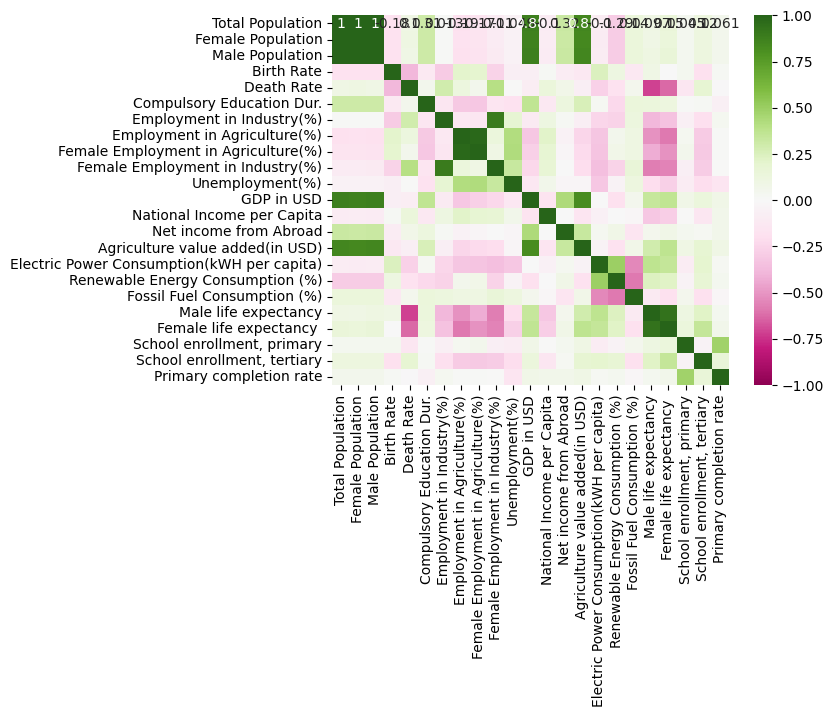

In [9]:
sns.heatmap(df_copy.drop(['Year', 'Country'], axis='columns').corr(),vmin=-1,vmax=1, annot=True,cmap="PiYG")
plt.show()

##### Observation insights
> Follow the heatmap above, the darker the color is, the correlation between two features represents significantly. For detail:
> 
> - The green color means directly proportional.
>
> - The pink color means inversely proportional.

**Question 01**: How does the correlation between features change in the top 10 countries with the LARGEST population?

When we have an answer for this question, we might see how features interaction with each other when the country population is large.

In [10]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION)

#largest=list(df_copy.loc[df_copy['Year']==2022].sort_values(by=['Total Population'],ascending=False).head(10)['Country'])
#temp=df_copy.loc[(df_copy['Country']==largest[0])|(df_copy['Country']==largest[1])|(df_copy['Country']==largest[2])|(df_copy['Country']==largest[3])|(df_copy['Country']==largest[4])|(df_copy['Country']==largest[5])|(df_copy['Country']==largest[6])|(df_copy['Country']==largest[7])|(df_copy['Country']==largest[8])|(df_copy['Country']==largest[9])]
#temp.drop(['Year', 'Country'],axis='columns').corr()
# Xét year=2022

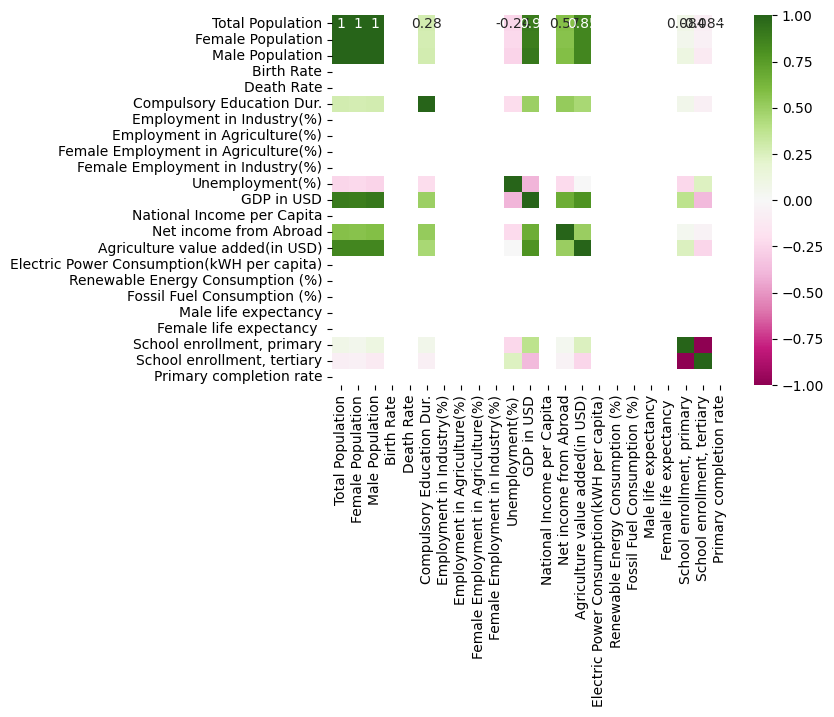

In [11]:
# YOUR CODE HERE

# sns.heatmap(temp.drop(['Year', 'Country'],axis='columns').corr(),vmin=-1,vmax=1, annot=True,cmap="PiYG")
# plt.show()
# large=df_copy.loc[df_copy['Year']==2022].sort_values(by=['Total Population'],ascending=False).head(10).drop(['Year', 'Country'],axis='columns').corr()
# sns.heatmap(large,vmin=-1,vmax=1, annot=True,cmap="PiYG")
# plt.show()

large=df_copy.loc[df_copy['Year']==2022].sort_values(by=['Total Population'],ascending=False).head(10).drop(['Year', 'Country'],axis='columns').corr()
sns.heatmap(large,vmin=-1,vmax=1, annot=True,cmap="PiYG")
plt.show()

**YOUR ANSWER**

**Question 02**: How does the correlation between features change in the top 10 countries with the SMALLEST population?

When we have an answer for this question, we might see how features interaction with each other when the conutry population is small.

In [12]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 

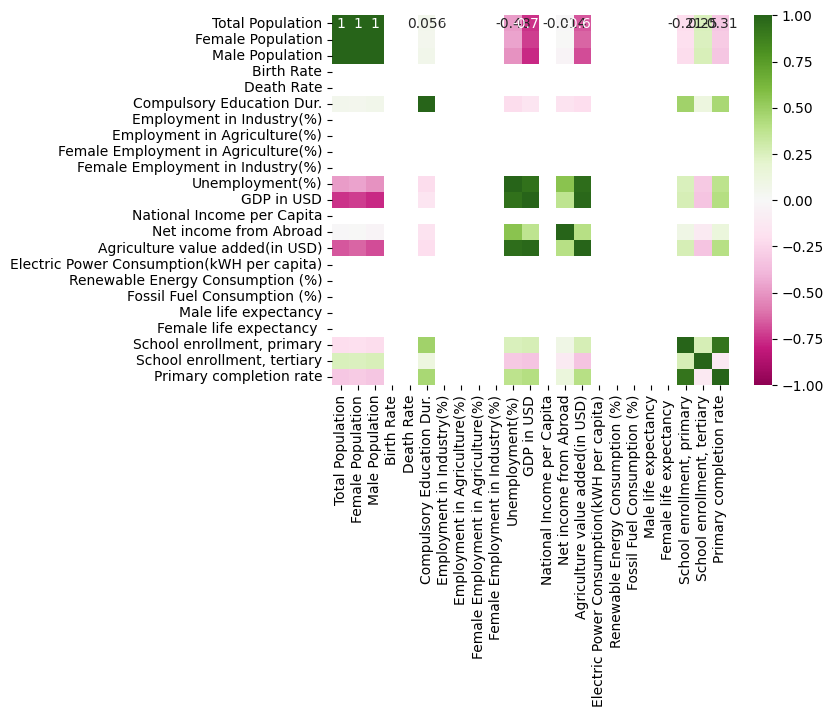

In [13]:
# YOUR CODE HERE

#smallest=list(df_copy.loc[df_copy['Year']==2022].sort_values(by=['Total Population'],ascending=True).head(10)['Country'])
#temp=df_copy.loc[(df_copy['Country']==largest[0])|(df_copy['Country']==largest[1])|(df_copy['Country']==largest[2])|(df_copy['Country']==largest[3])|(df_copy['Country']==largest[4])|(df_copy['Country']==largest[5])|(df_copy['Country']==largest[6])|(df_copy['Country']==largest[7])|(df_copy['Country']==largest[8])|(df_copy['Country']==largest[9])]
#temp.drop(['Year', 'Country'],axis='columns').corr()

small=df_copy.loc[df_copy['Year']==2022].sort_values(by=['Total Population'],ascending=True).head(10).drop(['Year', 'Country'],axis='columns').corr()
sns.heatmap(small,vmin=-1,vmax=1, annot=True,cmap="PiYG")
plt.show()

**YOUR ANSWER**

Example: Is that possible to drop any features that have less effect?
> We could drop any features that have less effect so that it maintains the meaning and the aim of the data and those features are unused.

## Making a question? (1.25 points)

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

**A possible question is:** What is the population situation of the countries on the continent today?

**Answering this question will** help us to see the current population status and predictions about the future development of the labor force of the countries on the continent are under consideration.

**How we answer this question**: we will consider the Average Birth Rate and Death Rate for countries across all the year.

### Pre-processing

In [14]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

Step 01: construct Average Birth Rate dataframe for each country.

In [15]:
# Create a new dataframe
avg_birthrate_df = pd.DataFrame()

# YOUR CODE HERE

#raise NotImplementedError()
avg_birthrate_df=df_copy.groupby('Country').agg('mean').loc[:,["Birth Rate"]]
avg_birthrate_df

,Birth Rate
Country,
Albania,13.738611
Austria,9.771897
Belarus,10.330933
Belgium,11.146897
Bosnia and Herzegovina,9.726040
Bulgaria,9.157611
Croatia,9.689504
Czech Republic,10.061183
Denmark,11.450468


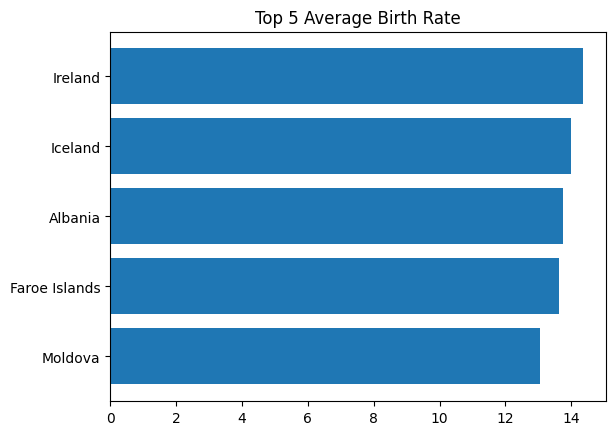

In [16]:
# You can just construct plotting for top countries
# YOUR CODE HERE
#raise NotImplementedError()
avg_birthrate_df=avg_birthrate_df.sort_values('Birth Rate',ascending=False).head(5).iloc[::-1]
plt.title("Top 5 Average Birth Rate")
plt.barh(avg_birthrate_df.index.get_level_values(0), avg_birthrate_df['Birth Rate'])
plt.show()

Step 02: construct Average Death Rate dataframe for each country.

In [17]:
# Create a new dataframe
avg_deathrate_df = pd.DataFrame()

# YOUR CODE HERE
#raise NotImplementedError()
avg_deathrate_df=df_copy.groupby('Country').agg('mean').loc[:,["Death Rate"]]
avg_deathrate_df

,Death Rate
Country,
Albania,7.194091
Austria,9.517733
Belarus,13.703341
Belgium,9.899876
Bosnia and Herzegovina,10.088876
Bulgaria,14.860591
Croatia,11.981841
Czech Republic,10.639162
Denmark,10.135591


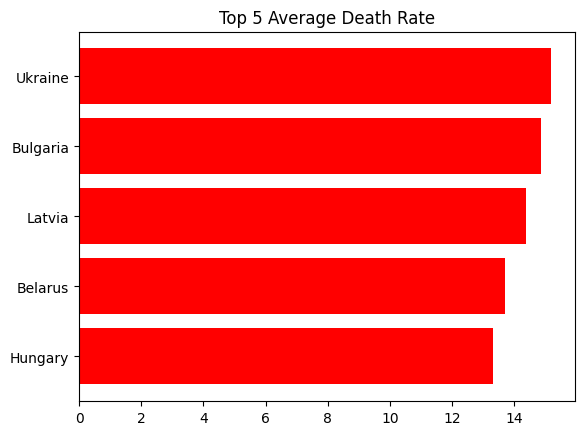

,Death Rate
Country,
Hungary,13.310591
Belarus,13.703341
Latvia,14.371305
Bulgaria,14.860591
Ukraine,15.199876


In [18]:
# You can just construct plotting for top countries
# YOUR CODE HERE
# #raise NotImplementedError()
avg_deathrate_df=avg_deathrate_df.sort_values('Death Rate',ascending=False).head(5).iloc[::-1]
plt.title("Top 5 Average Death Rate")
plt.barh(avg_deathrate_df.index.get_level_values(0), avg_deathrate_df['Death Rate'],color='red')
plt.show()
avg_deathrate_df

**TODO**: Give your obervation here

*For birth rate:*
>Diversity in Birth Rates: These top 5 European countries have relatively high average birth rates, which indicates that there is a diversity of birth rates within Europe. While some European countries have lower birth rates, others still maintain higher birth rates.
>
>Potential Societal and Economic Implications: Higher birth rates can have several societal and economic implications. They can lead to a younger population, potentially affecting the labor force, social services, and healthcare systems. Policymakers in these countries might need to consider the challenges and opportunities associated with higher birth rates.
>
>Cultural and Social Factors: Cultural and social factors often play a significant role in birth rates. These countries may have cultural norms or policies that encourage larger families or earlier childbearing.
>
>Family-Friendly Policies: Some of these countries might have family-friendly policies in place, such as paid parental leave, childcare support, or financial incentives for families, which can influence birth rates.
>
>Iceland's Position: Iceland is one of the countries on the list. Despite its relatively small population, it has a high birth rate. This may be due to various factors, including a strong social welfare system, healthcare, and a generally high standard of living.
>
>Variability: It's essential to recognize that birth rates can vary within these countries and might be influenced by regional, urban-rural, or socioeconomic differences.
>
>Demographic Trends: Understanding the reasons behind high birth rates in these countries can shed light on demographic trends and provide valuable information for policymakers and researchers.
>
>Long-Term Impact: High birth rates can lead to a higher proportion of young people in the population. This might have implications for future demographic trends, such as population growth and age distribution.
>
>Comparative Analysis: It's useful to compare these countries with other European nations with lower birth rates to identify factors that contribute to these differences.

*For death rate:*
>Variability in Death Rates: These top 5 European countries have relatively high average death rates, indicating a level of variability in death rates within Europe. While some European countries have lower death rates, others still experience higher mortality.
>
>Demographic Trends: High death rates can be indicative of various demographic and health-related factors within these countries. Understanding the reasons behind high death rates can provide insights into public health and healthcare systems.
>
>Healthcare Infrastructure: The quality and accessibility of healthcare infrastructure and services can significantly impact death rates. These countries might face challenges in healthcare provision, which could contribute to higher mortality.
>
>Disease and Health Factors: High death rates could be influenced by the prevalence of specific diseases, lifestyle factors, or the aging population. Understanding the leading causes of death within these countries is essential.
>
>Aging Population: An aging population can contribute to higher death rates, as older individuals are more prone to certain health conditions. It's important to examine the age distribution in these countries.
>
>Social and Economic Factors: Socioeconomic conditions, including income levels, access to education, and employment opportunities, can affect overall health and mortality. Disparities in these factors might be contributing to higher death rates.
>
>Public Health Policies: Examining public health policies and their effectiveness in these countries is crucial. These policies could include healthcare access, disease prevention, and health promotion.
>
>Cross-Country Comparisons: Comparing these countries to others with lower death rates can help identify areas where improvements could be made, whether in healthcare, lifestyle, or socioeconomic factors.
>
>Potential for Interventions: Identifying the specific causes and determinants of high death rates in these countries can help policymakers and healthcare professionals develop targeted interventions and strategies to reduce mortality.
>
>Long-Term Implications: High death rates can have long-term implications for population growth, age distribution, and the overall health of a nation. Addressing the factors contributing to high death rates is crucial for sustainable development.

## Making your own question 01? (1.5 points)

**YOUR ANSWER HERE**

**Question:** Does a country with the larger population get the more GDP?

**Answer the question will help** the government to make right decisions in the policies or the rules of population planning, it could be useful to develop the general economics of a country.

**How to answer:** Represent the relationship between the population and the GDP of countries in 2022.

### Pre-processing

In [19]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

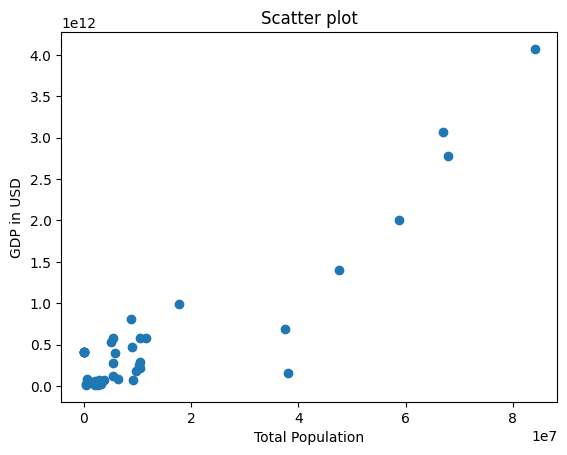

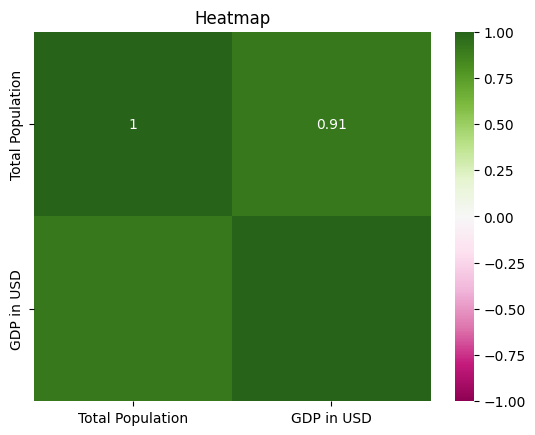

In [20]:
# YOUR CODE HERE
temp=df_copy.loc[df_copy['Year']==2022][['Total Population','GDP in USD']].sort_values('Total Population')
plt.title("Scatter plot")
plt.scatter(temp['Total Population'], temp['GDP in USD'])
plt.xlabel("Total Population")
plt.ylabel("GDP in USD")
plt.show()
plt.title("Heatmap")
sns.heatmap(temp.corr(),vmin=-1,vmax=1, annot=True,cmap="PiYG")
plt.show()

**Summary**
> The country with the more population will get the more GDP in Europe.
>
> However, there is just a potential connection between a larger population and a higher GDP, this relationship is influenced by a multitude of factors. The quality and skills of the workforce, the level of technology and innovation, the availability of resources, and the quality of infrastructure and governance all play crucial roles. It's important to consider these complexities when examining the impact of population size on economic output.

## Making your own question 02? (1.5 points)

**YOUR ANSWER HERE**

**Question:** Is the gender ratio between in population and in agriculture or industry the same?

**Answer the question will help** the government to make best strategies for the industry and the argiculture about the need of labor force. Thanks to knowing the strength of each gender in working, the government could decide some population planning for economic development.

**How to answer:** Comparing the average ratios between male and female in population, agriculture and industry in 2022

### Pre-processing

In [21]:
# YOUR CODE HERE (OPTION) 
df_copy[['Male Population','Female Population','Female Employment in Agriculture(%)','Female Employment in Industry(%)']]
df_copy['M_Ratio_Population']=df_copy['Male Population']/(df_copy['Female Population']+df_copy['Male Population'])*100
df_copy['F_Ratio_Population']=df_copy['Female Population']/(df_copy['Female Population']+df_copy['Male Population'])*100
df_copy['M_Ratio_Agriculture']=100-df_copy['Female Employment in Agriculture(%)']
df_copy['F_Ratio_Agriculture']=df_copy['Female Employment in Agriculture(%)']
df_copy['M_Ratio_Industry']=100-df_copy['Female Employment in Industry(%)']
df_copy['F_Ratio_Industry']=df_copy['Female Employment in Industry(%)']
temp=df_copy[['M_Ratio_Population','F_Ratio_Population','M_Ratio_Agriculture','F_Ratio_Agriculture','M_Ratio_Industry','F_Ratio_Industry']]
temp=temp.mean()

### Analyzing to get the answer

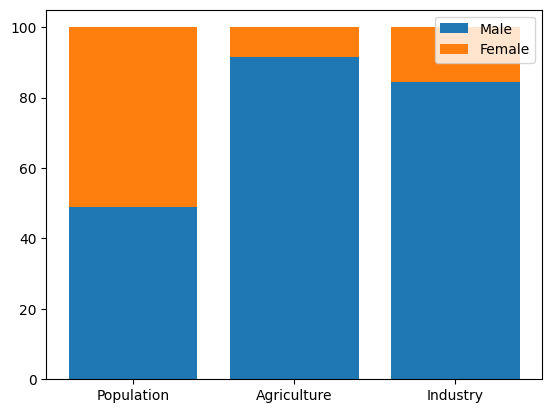

In [22]:
# YOUR CODE HERE
groups=['Population','Agriculture','Industry']

male=[temp['M_Ratio_Population'],temp['M_Ratio_Agriculture'],temp['M_Ratio_Industry']]
female=[temp['F_Ratio_Population'],temp['F_Ratio_Agriculture'],temp['F_Ratio_Industry']]

plt.bar(groups,male)
plt.bar(groups,female,bottom=male)
plt.legend(['Male','Female'])
plt.show()

**Summary**
> The gender ratios between in population and in agriculture or industry is significantly different.
>
> Significant gender disparities in the general population and in sectors like agriculture and industry reflect complex societal issues. Addressing these disparities requires multifaceted efforts, including policy changes, cultural shifts, and economic empowerment initiatives to promote gender equality and ensure that individuals have equal opportunities and representation in the workforce.